In [1]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn import tree
import numpy as np
import pandas as pd

In [3]:
df= pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [5]:
 tree_clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [6]:
 X.shape, y.shape

((768, 8), (768,))

[Text(0.5, 0.8333333333333334, 'x[1] <= 127.5\ngini = 0.454\nsamples = 768\nvalue = [500, 268]'),
 Text(0.25, 0.5, 'x[7] <= 28.5\ngini = 0.313\nsamples = 485\nvalue = [391, 94]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.155\nsamples = 271\nvalue = [248, 23]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.443\nsamples = 214\nvalue = [143, 71]'),
 Text(0.75, 0.5, 'x[5] <= 29.95\ngini = 0.474\nsamples = 283\nvalue = [109, 174]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.432\nsamples = 76\nvalue = [52, 24]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.399\nsamples = 207\nvalue = [57, 150]')]

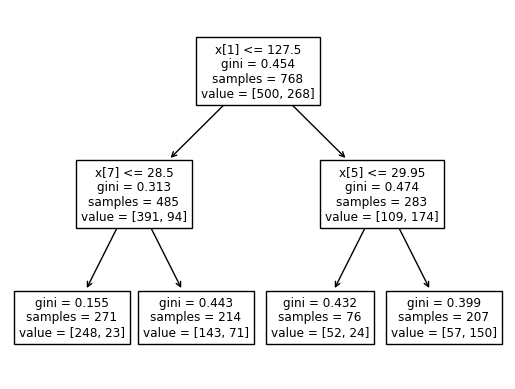

In [7]:
 tree.plot_tree(tree_clf)

In [12]:
# Plot decision tree boundries 
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14) 